# Example: REV analysis for correlation functions

This example shows the functionality of REVAnalyzer library and the structure of output for vector metric REV
analysis taking correlation functions (CF) as the example. 

In [2]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import S2, PoreSize
from revanalyzer.vectorizers import CFVectorizer, DirectVectorizer

[11:51:26] ERROR    PARDISO solver not installed, run `pip install           ]8;id=1732006286.1795588-841991;file:///home/azubov/miniconda3/lib/python3.9/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:56
                    pypardiso`. Otherwise, simulations will be slow. Apple M                 
                    chips not supported.

In [3]:
#initialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: None
outputdir = 'output' # path to outputfolder containig image, default: 'output'
n_threads = 32 #number of threads, default: 1

norm = 2 
#Norm of vectors used in REV analysis. The same, as parameter 'ord' in numpy.linalg.norm function; 
#default: 2.

mode = 'max' 
#can be 'all' or 'max'. If mode = 'all', CF calculated for 'x', 'y' and 'z' directions are concatenate into one
#vector during vectorization. If mode = 'max', CF calculated for different directions are vectorizes independently.
#Then at the analisys step, maximal differences and deviations over 3 directions are taking for REV sizes calculation.

vectorizer = CFVectorizer(norm = norm, mode = mode) #vectorizer inizialization

show_time = True #default: False. Added to monitor time cost for large images.

normalize = True #default: True. If True, CF are normalized to satisfy the condition CF(0) = 1. 
#See the details in Karsanina et al. (2021). Compressing soil structural information into parameterized correlation 
#functions. European Journal of Soil Science, 72(2), 561-577.

#metric initialization. Here, we take S_2 correlation function.
metric = S2(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time, normalize = normalize) 

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)


In [3]:
#generate metric data for all the subsamples
analyzer.generate()

cut  cut1_4 , run time: 
--- 17.969063997268677 seconds ---
cut  cut1_5 , run time: 
--- 18.111278772354126 seconds ---
cut  cut3_5 , run time: 
--- 18.338744401931763 seconds ---
cut  cut1_2 , run time: 
--- 19.238072872161865 seconds ---
cut 
 cut1_0 , run time: 
--- 19.262086868286133 seconds ---
cut  cut1_7 , run time: 
--- 19.27155613899231 seconds ---
cut  cut4_3 , run time: 
--- 18.630083799362183 seconds ---
cut  cut4_0 , run time: 
--- 18.863634824752808 seconds ---cut  cut1_3 , run time: 
--- 19.37813639640808 seconds ---
cut  cut4_2 , run time: 
--- 18.798022031784058 seconds ---
cut  cut2_1 , run time: 
--- 19.520363569259644 seconds ---
cut  cut2_3 , run time: 
--- 19.55760383605957 seconds ---
cut  cut2_5 , run time: 
--- 19.567188262939453 seconds ---
cut  cut2_2 , run time: 
--- 19.61064863204956 seconds ---
cut  cut1_1 , run time: 
--- 19.78885531425476 seconds ---
cut  cut1_6 , run time: 
--- 19.811800718307495 seconds ---
cut  cut3_2 , run time: 
--- 19.8783996105194

In [4]:
#one can read the metric value from the specific subsample. Output format is numpy array. 
#As we chose mode = 'max', it consists of 3 arrays corresponding to 3 directions. 
step = 3
cut_id = 5
value = analyzer.read(step, cut_id)
print(value)

[array([ 1.        ,  0.89816778,  0.7975946 ,  0.69922063,  0.60410397,
        0.51342218,  0.4284998 ,  0.35074416,  0.28122831,  0.22056117,
        0.16888426,  0.12586033,  0.09072777,  0.06226059,  0.03956102,
        0.02114798,  0.00667652, -0.00474844, -0.01361289, -0.02063316,
       -0.02587744, -0.02986095, -0.03274695, -0.03466998, -0.03571098,
       -0.03584131, -0.0354219 , -0.03471143, -0.03386671, -0.03278244,
       -0.03123606, -0.0291138 , -0.02678763, -0.02416441, -0.02170228,
       -0.01909165, -0.01714862, -0.01537472, -0.01371603, -0.01234412,
       -0.01154724, -0.0113498 , -0.01169401, -0.01239062, -0.01345666,
       -0.01466409, -0.01594327, -0.01752138, -0.0190113 , -0.02039744,
       -0.02178699, -0.02323483, -0.02476373, -0.02619116, -0.02719846,
       -0.02796521, -0.0288139 , -0.02977534, -0.03086132, -0.03227113,
       -0.03349207, -0.03476145, -0.03616591, -0.03707616, -0.03781843,
       -0.03836702, -0.03839671, -0.03755313, -0.03603232, -0.0

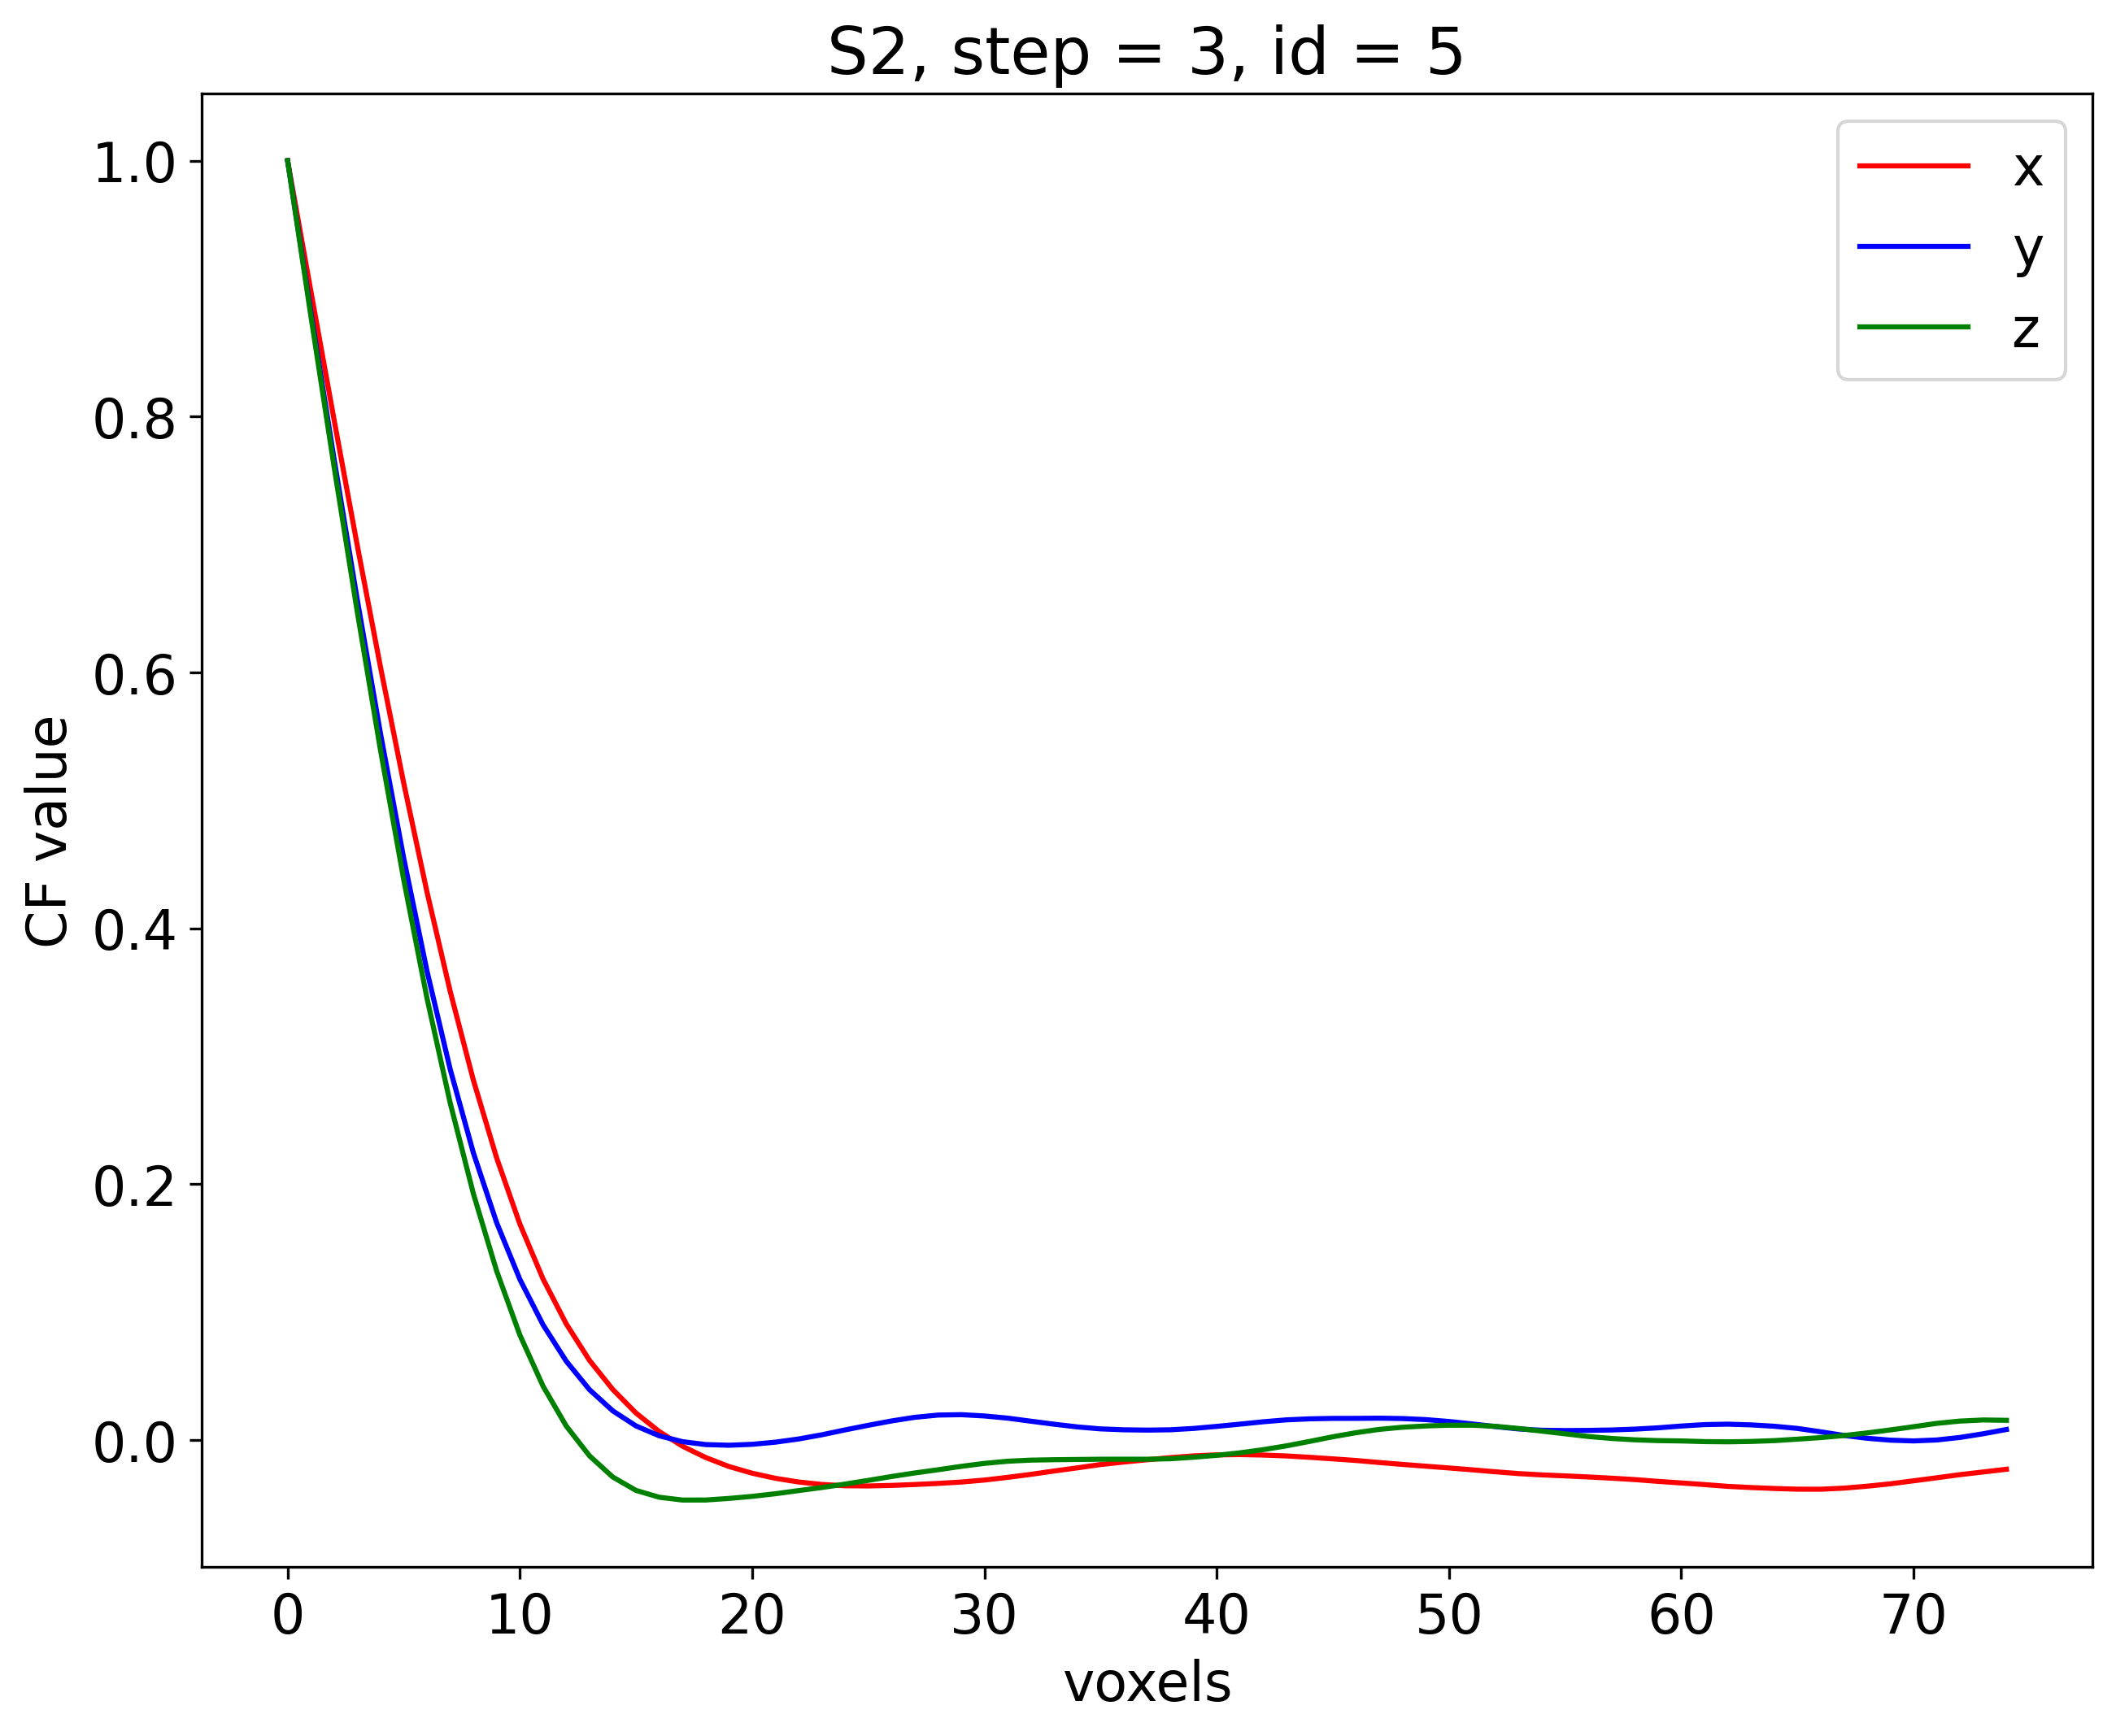

In [5]:
#One can visualize vector metric for each subcube:
analyzer.show(3, 5)

![Subsamples selection for dREV and sREV analysis. i is the index of the subsamples selection step.](fig_subsamples.png)


During the vectorization of generated values for vector metric $\mathbf{V}$, at each selection step $i$ subsamples SC$_k$($i$) and SC$_l$($i+1$) are taken. Then: 1) for each pair of indices ($k$,$l$) the vector $\mathbf{V}_{(i+1)l}$ is modified to the vector $\mathbf{V^*}_{(i+1)l}$ to have the same number of bins and range as the vector  $\mathbf{V}_{ik}$ (see documentation for details); 2) normalized distance between the vectors $\mathbf{V^*}_{(i+1)l}$ and $\mathbf{V}_{ik}$ is computed:

$\delta(i,k,l) = 2 \frac{||\mathbf{V^*}_{(i+1)l} - \mathbf{V}_{ik}||}{||\mathbf{V^*}_{(i+1)l}||+||\mathbf{V}_{ik}||}$.

Order of the vector norm ||$\mathbf{V}$|| is the input parameter of any vectorizer used in the library.

In [6]:
#vectorization
analyzer.vectorize()

In [7]:
#the results of vectorization are available in the subdirectory which is created in output directory:
analyzer._outputdir_vectorized_cut_values

'output/ceramic300/S2/vectorized_cuts_values'

In [8]:
#This subdirectory contains json files with names 'cut_l', where l is the step number.
import os
os.listdir(analyzer._outputdir_vectorized_cut_values)

['cut_3', 'cut_1', 'cut_5', 'cut_4', 'cut_2']

Each file 'cut_l' contains a dictionary.A key of its element is a pair of subcube indices ($k$,$l$), and a value -
list of 3 elements: $\mathbf{V}_{k(i)}$, $\mathbf{V^*}_{l(i+1)}$ and $\delta(i,k,l)$. If we have a case of CF metric with 'max' mode, each element of this list is a sublist of three directional components.

In [4]:
#to get sREV and dREV sizes one should fix correponding thresholds. Then we can analyze the vectorized data.
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

For the estimation of dREV and sREV sizes for vector metric, fist we calculate mean values $\bar{\delta}(i)$ over all pairs of indices ($k$,$l$) and its standard deviation $\sigma_i$.  $\sigma_{norm}(i) = \sigma_i / \bar{\delta}(i)$.

Then for the estimation of dREV size we use the following formula:

$m: \forall i \ge m$, $\bar{\delta}(i) < \varepsilon_{dREV}$ (dREV_size_1),

where $\varepsilon_{dREV}$ is dREV threshold.

For the estimation of sREV size we use two following formulas:

$m: \forall i \ge m$, $\sigma_{norm1}(i) = \sigma_i/ \varepsilon_{dREV} < \varepsilon_{sREV}$ (sREV_size_1), 

and

$m: \forall i \ge m$, $\sigma_{norm2}(i) = \sigma_i/ D(i) < \varepsilon_{sREV}$ (sREV_size_2), 

where $D(i) = \varepsilon_{dREV}$, if $\bar{\delta}(i) < \varepsilon_{dREV}$ and $D(i) = \bar{\delta}(i)$ if
$\bar{\delta}(i) \ge \varepsilon_{dREV}$; $\varepsilon_{sREV}$ is sREV threshold.

In the case of CF metric with 'max' mode, we separately calculate $\bar{\delta}(i)$, $\sigma_i$, dREV and sREV sizes for $x$, $y$ and $z$ directions and take the maximal values over all directions.  

Attributes metric_mean, metric_std, metric_normed_std1, normed_std2 represent the values $\bar{\delta}(i)$,  $\sigma_i$,  $\sigma_{norm1}(i)$ and $\sigma_{norm2}(i)$.

In [5]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.22303384675236085, 2: 0.13640007205150484, 3: 0.09692014999059355, 4: 0.07463541187357256, 5: 0.06613646748174071}
{1: 0.09957365810282669, 2: 0.05400663135500056, 3: 0.03481862746864772, 4: 0.028097681973366886}
{1: 0.4978682905141334, 2: 0.2700331567750028, 3: 0.1740931373432386, 4: 0.14048840986683442}
{1: 0.5223532580599693, 2: 0.2700331567750028, 3: 0.1740931373432386, 4: 0.14048840986683442}


In [6]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

100
150
150


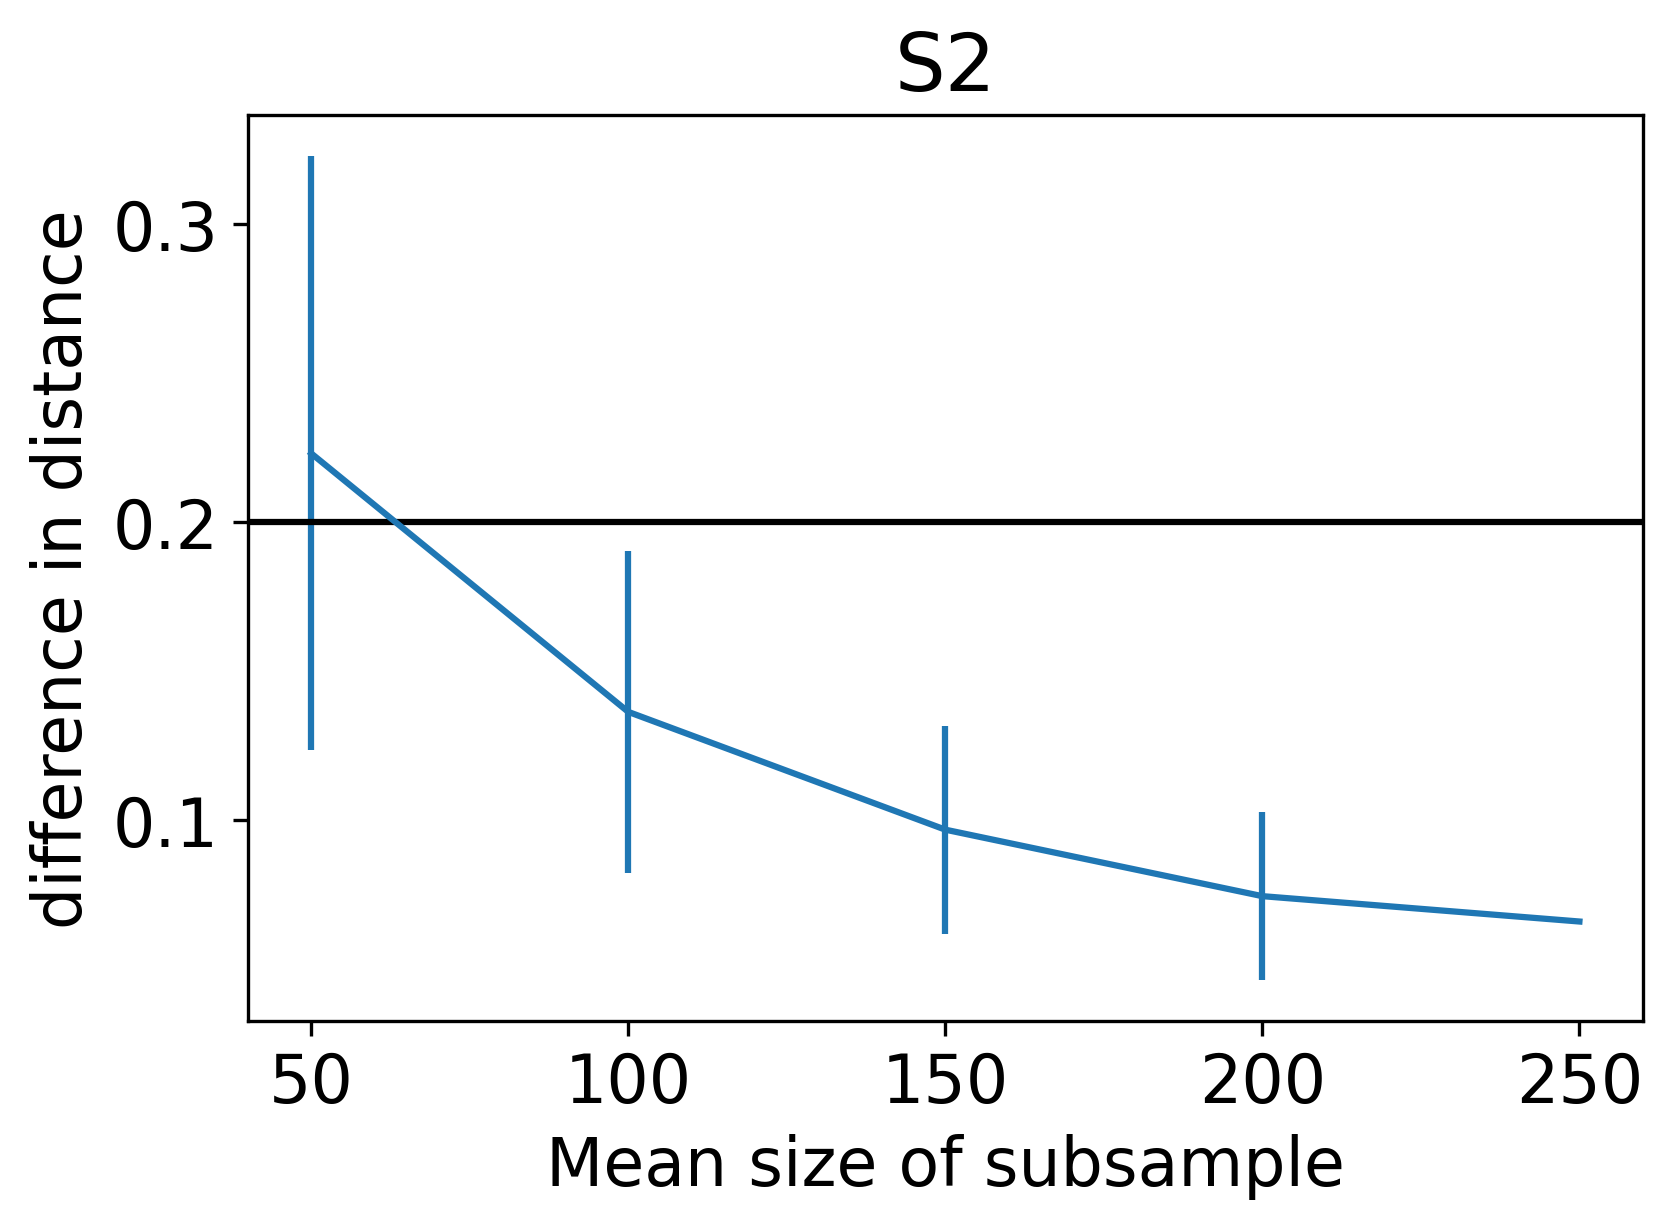

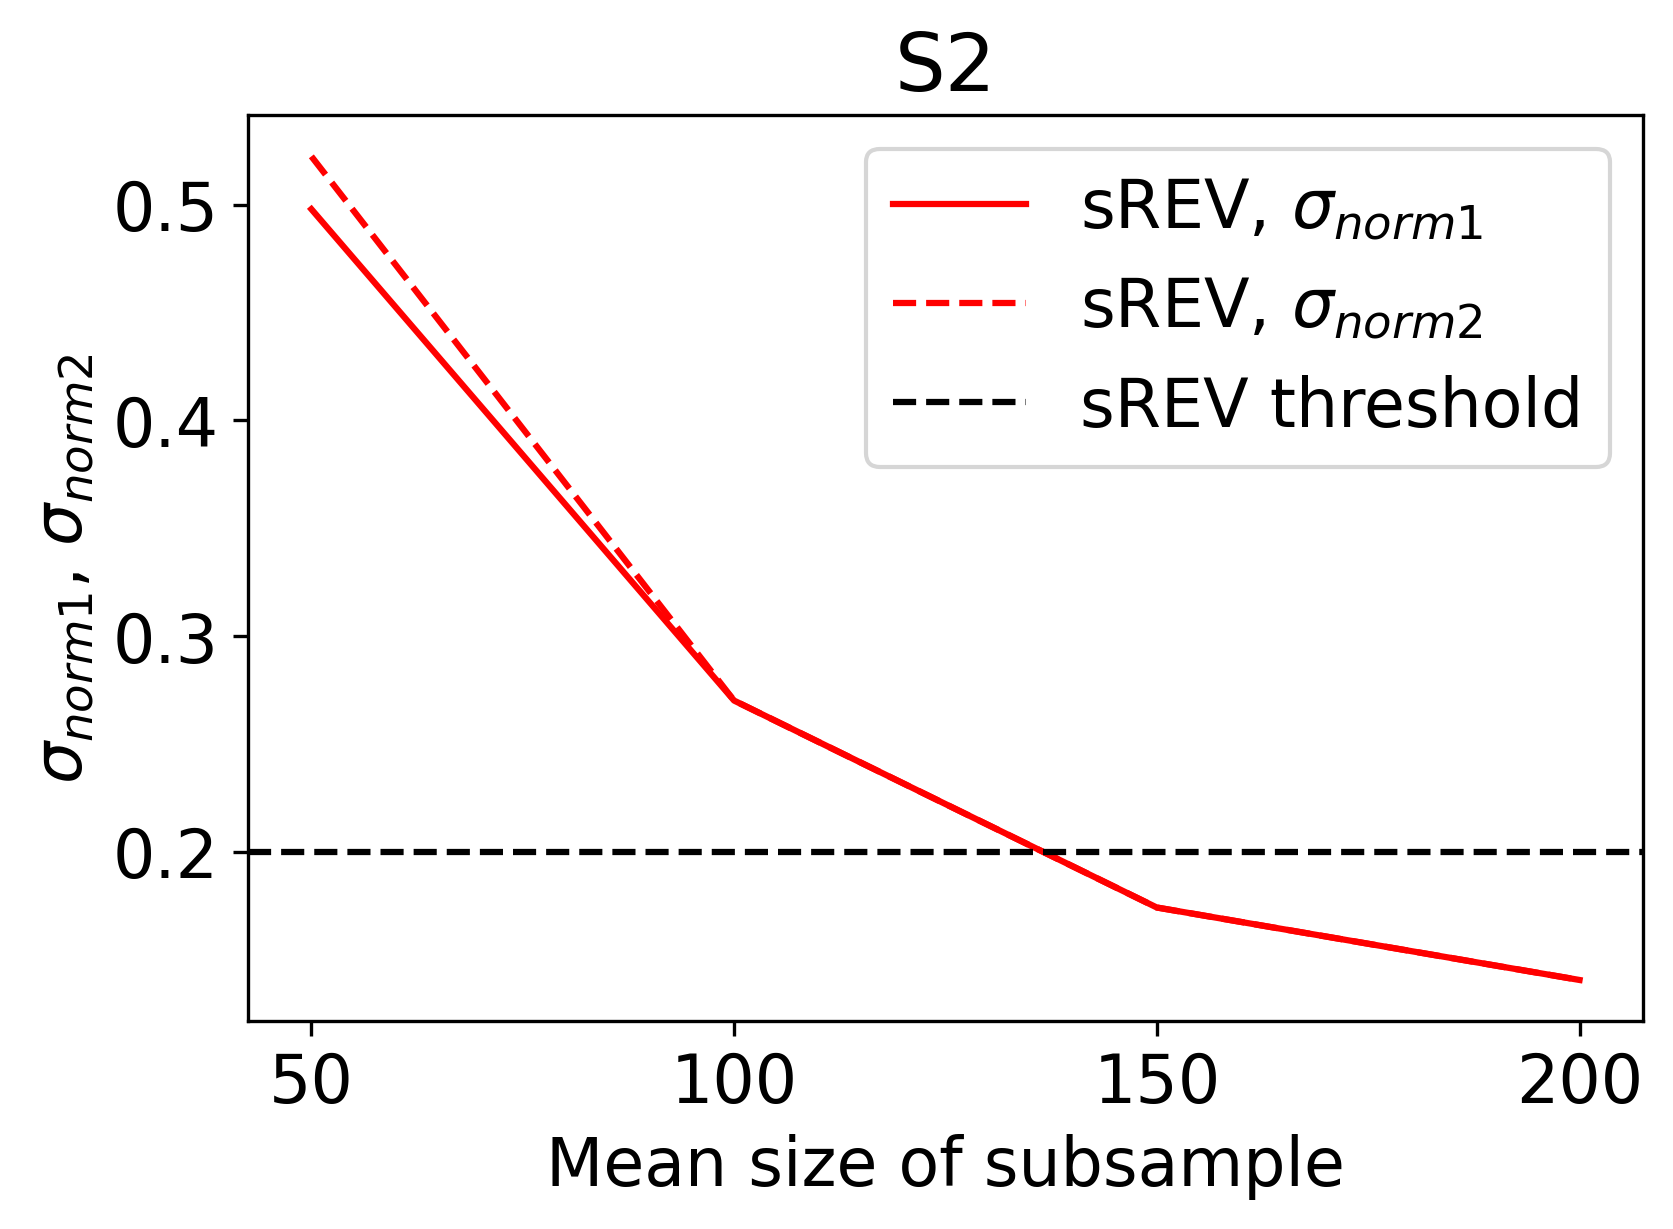

In [7]:
#the results of REV analysis can be visualized. The first figure presents mean and std values (as errorbars) 
#of difference in distance between subcubes of neighbour sizes as the function of subcube linear size. 
#The second one - the dependece of \sigma_{norm1} and \sigma_{norm2} alculated as in Eqs. above. 
#One can visually estimate dREV and sREV sizes from this figure, as well.
#These figures are saved as .png in the subdirectory analyzer.outputdir/figs/ .
analyzer.show_results()

In [8]:
#Now let us take CFVectorizer with mode = 'all'. Note, that calling the function generate() can be skiped,
#as data generation does not depend on vectorizer.

vectorizer = CFVectorizer(mode='all')
metric = S2(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time, normalize = normalize) 
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [9]:
analyzer.vectorize()
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.19272782880236192, 2: 0.13159288887284576, 3: 0.09640332505310752, 4: 0.06634110127355802, 5: 0.04809756036724299}
{1: 0.04739563393349447, 2: 0.034469420877913985, 3: 0.02184186669487897, 4: 0.01389147833234386}
{1: 0.23697816966747234, 2: 0.1723471043895699, 3: 0.10920933347439483, 4: 0.0694573916617193}
{1: 0.23697816966747234, 2: 0.1723471043895699, 3: 0.10920933347439483, 4: 0.0694573916617193}


In [10]:
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

50
100
100


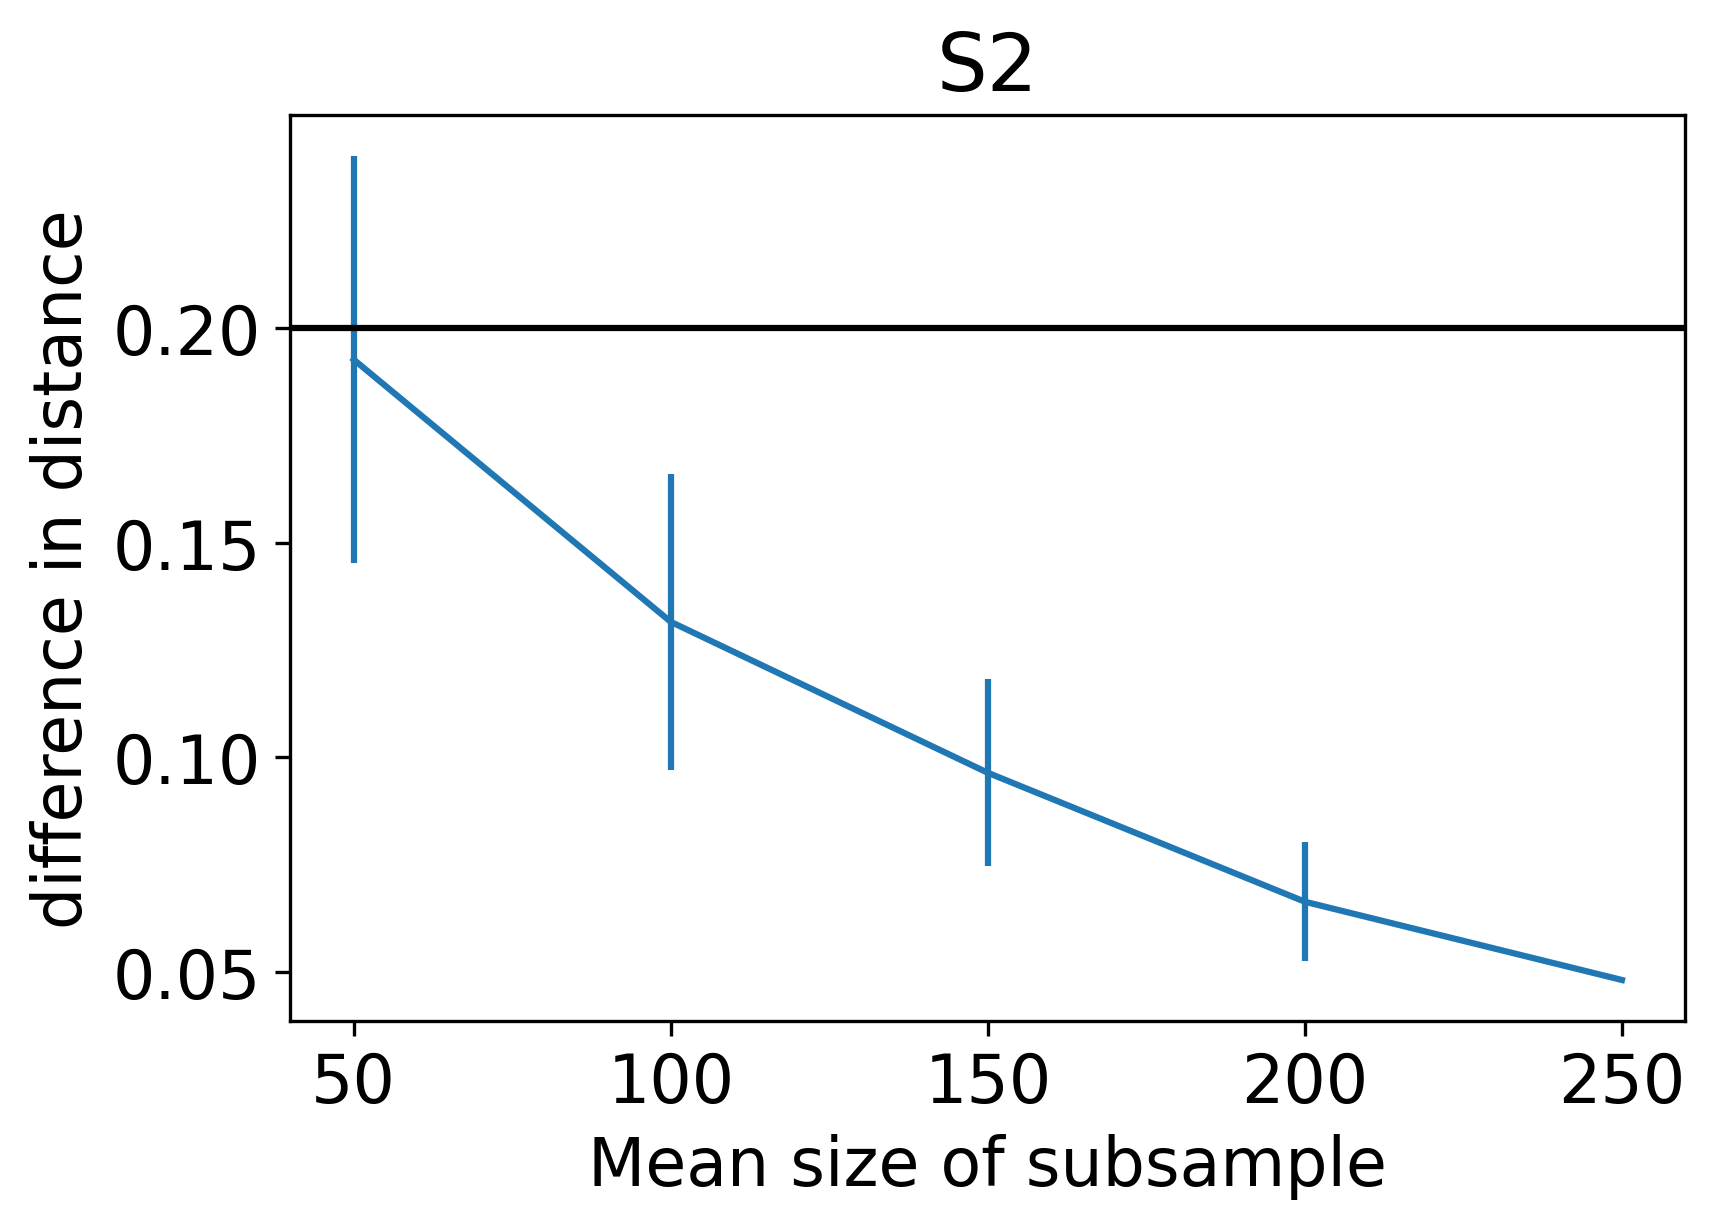

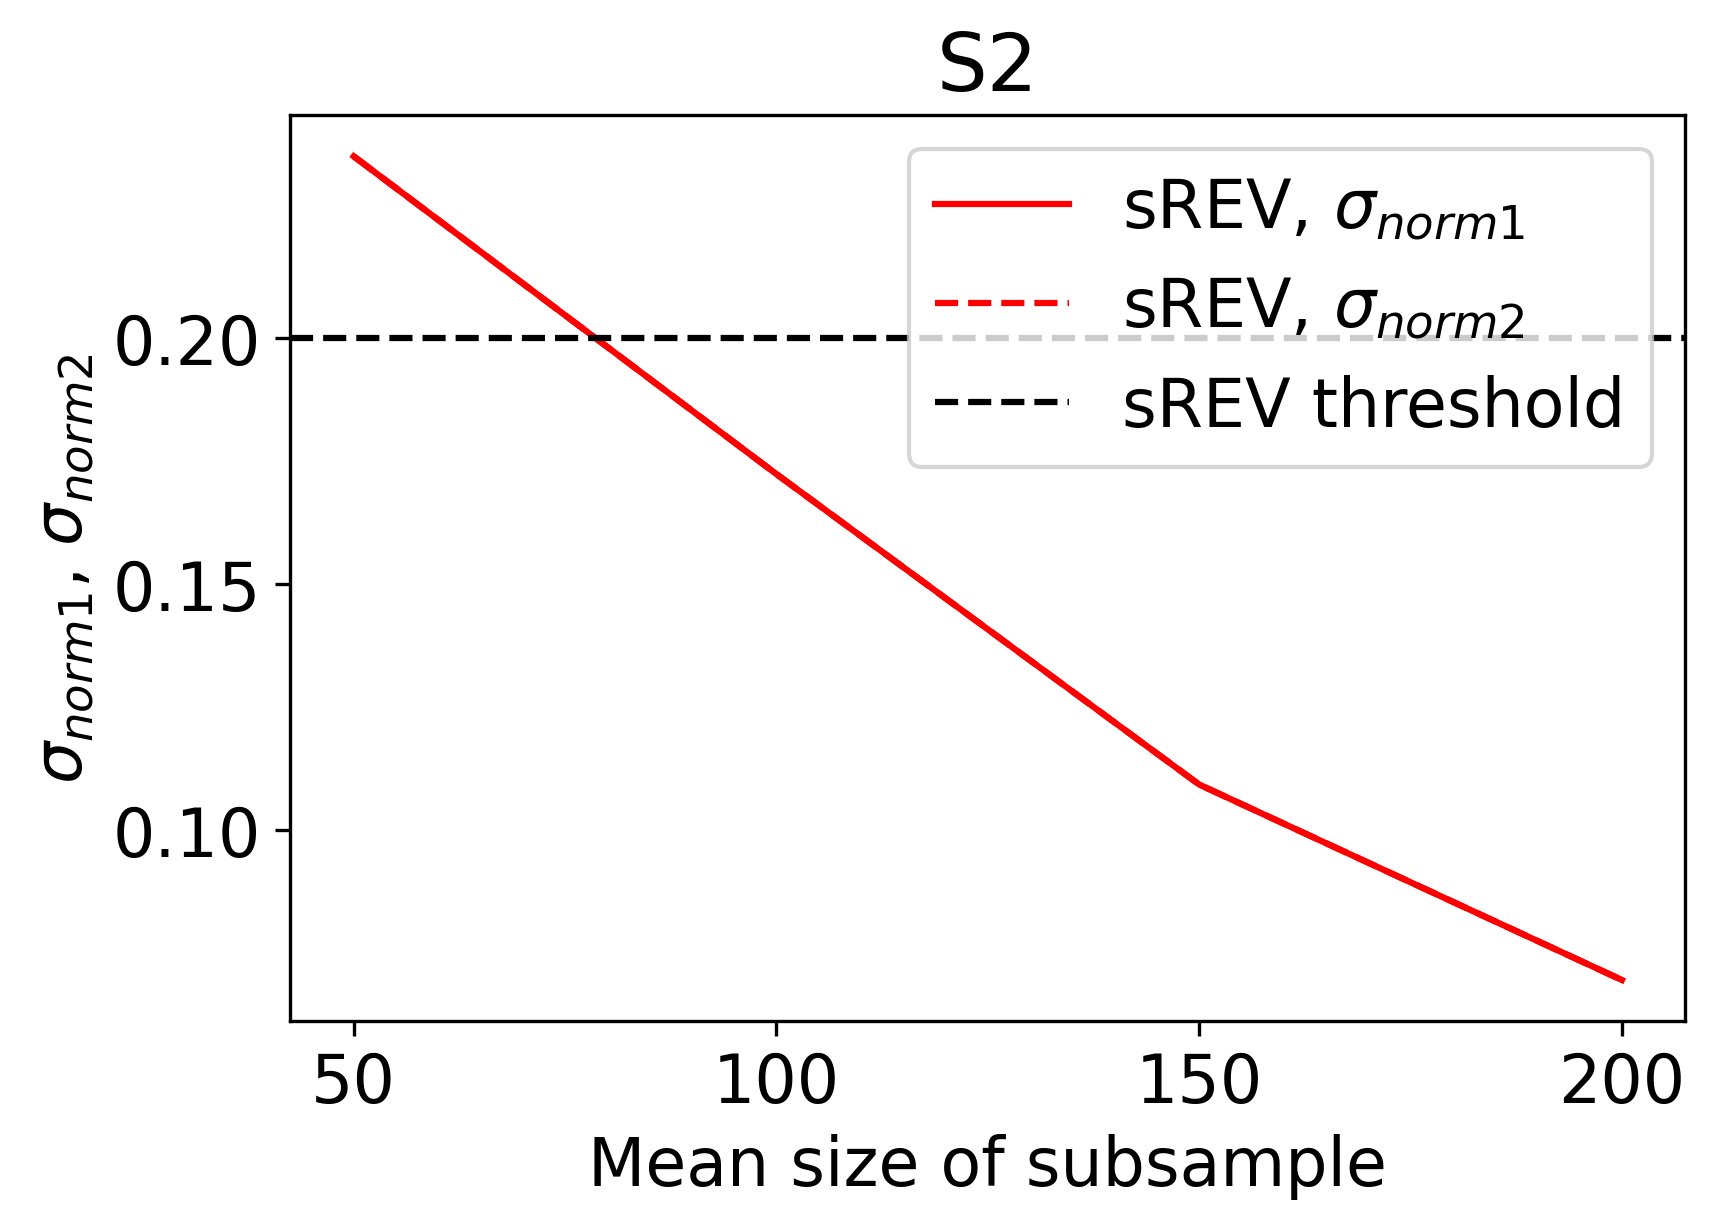

In [11]:
analyzer.show_results()

In [12]:
#Example of REV analysis of histogram-based CF
norm = 2  #Norm of vectors used in REV analysis. The same, as parameter 'ord' in numpy.linalg.norm function; 

vectorizer = DirectVectorizer(norm = norm)

metric = PoreSize(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time)
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)
analyzer.generate()


cut1_8 , run time: 
--- 13.596769332885742 seconds ---
cut1_6 , run time: 
--- 13.616725206375122 seconds ---
cut1_7 , run time: 
--- 13.80495309829712 seconds ---
cut1_5 , run time: 
--- 13.81855297088623 seconds ---
cut1_4 , run time: 
--- 13.906473636627197 seconds ---
cut2_4cut2_7 , run time:  
, run time: --- 13.891204833984375 seconds ---

--- 13.866799592971802 seconds ---
cut2_2 , run time: 
--- 13.93030834197998 seconds ---
cut1_0cut2_3  , run time: , run time: 

--- 13.987303733825684 seconds ------ 13.9402437210083 seconds ---

cut1_3 , run time: 
--- 13.99670696258545 seconds ---
cut1_2 , run time: 
--- 14.048542976379395 seconds ---
cut2_6 , run time: 
--- 13.99640440940857 seconds ---
cut2_5 , run time: 
--- 14.015874862670898 seconds ---
cut1_1 , run time: 
--- 14.087203979492188 seconds ---
cut2_0 , run time: 
--- 14.075712203979492 seconds ---
cut2_1 , run time: 
--- 14.079363346099854 seconds ---
cut2_8 , run time: 
--- 14.13743281364441 seconds ---
cut3_3 , run time:

In [13]:
analyzer.vectorize()
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.11569339588846107, 2: 0.06189529112898783, 3: 0.03524613614199163, 4: 0.01800164498478736, 5: 0.004415375680733222}
{1: 0.08541677064586657, 2: 0.03818633215464573, 3: 0.018945398482710697, 4: 0.009923999651226114}
{1: 0.42708385322933284, 2: 0.19093166077322865, 3: 0.09472699241355348, 4: 0.04961999825613057}
{1: 0.42708385322933284, 2: 0.19093166077322865, 3: 0.09472699241355348, 4: 0.04961999825613057}


In [14]:
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

50
100
100


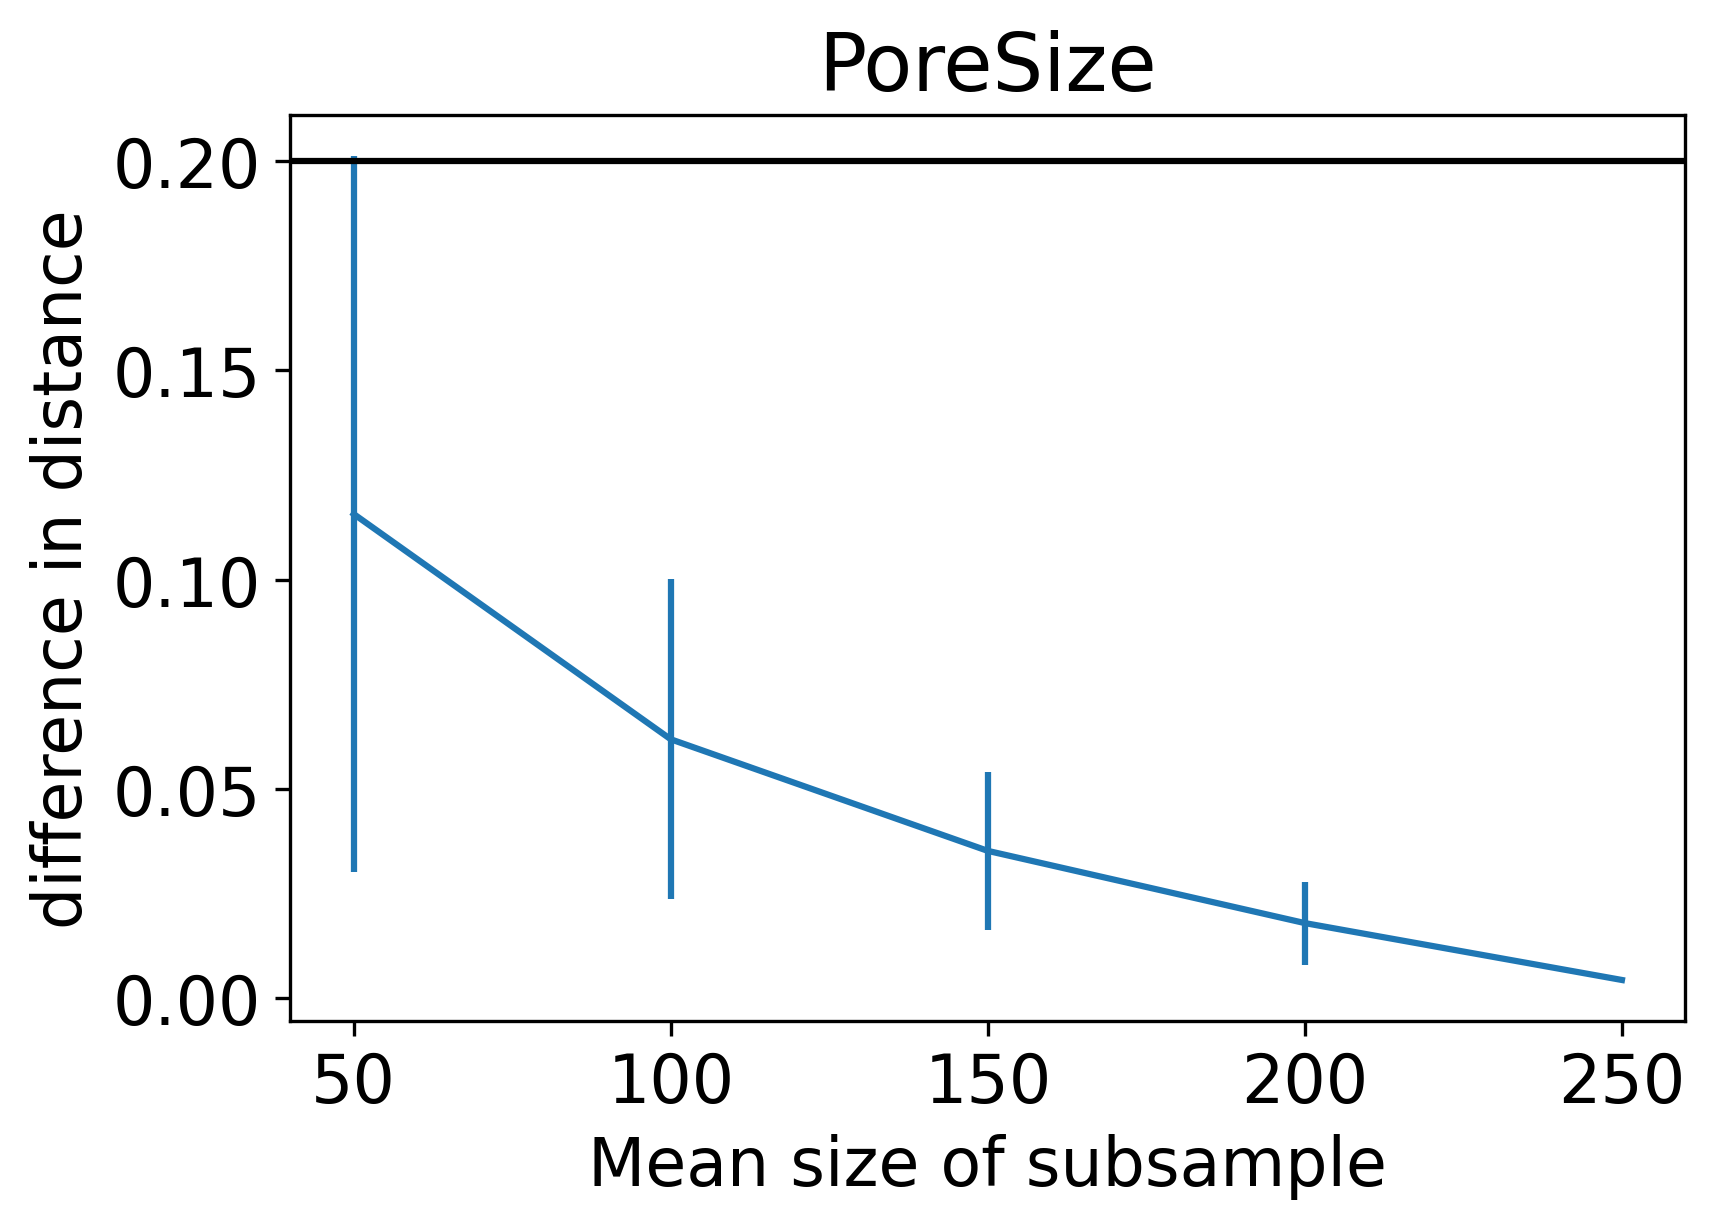

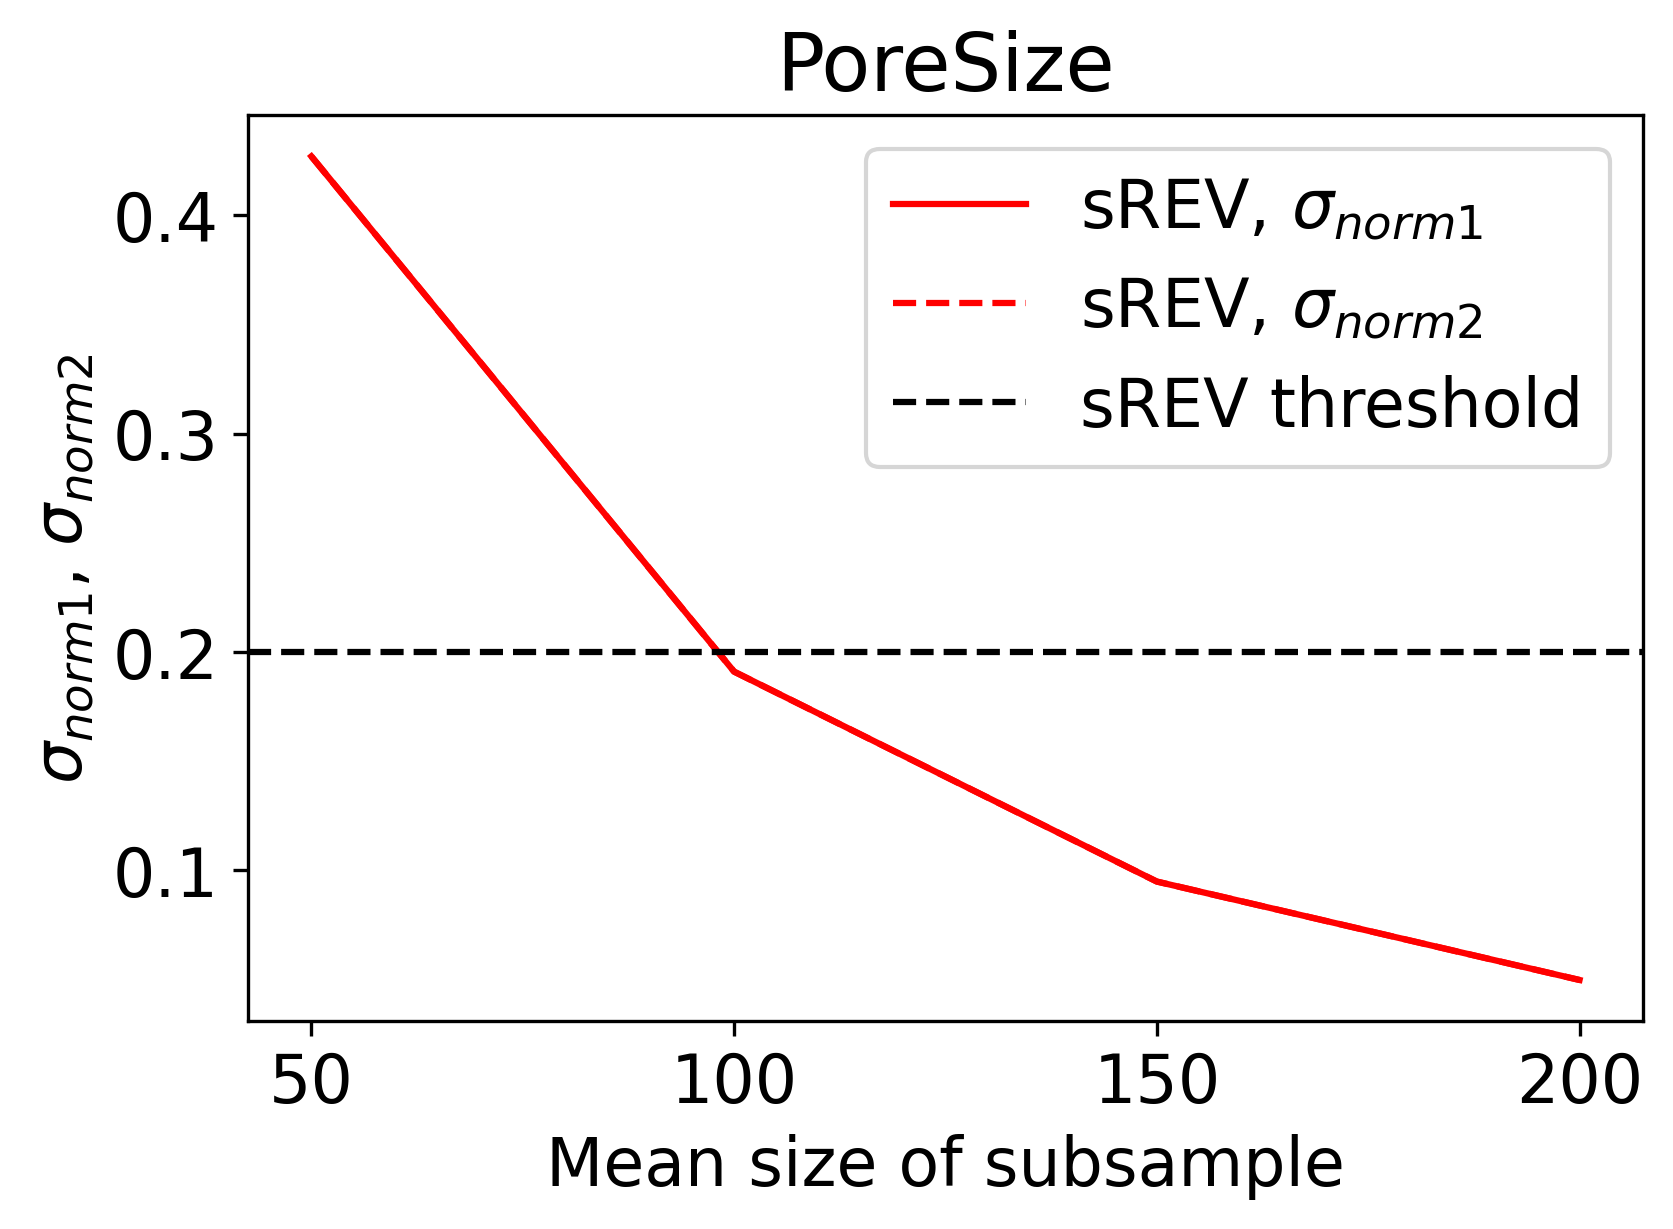

In [7]:
analyzer.show_results()